## Time Series Analysis: Home Assignment 2

due to **14.03.21 23:00** MSK


Enter your name below: 

In [88]:
name='Petrov Artem' 

### Contents

1. **Data preparation (6 points)**
    0. Import functions 
    1. Data parsing(1.5 pt.)
    2. Join datasets (1 pt.)
    3. Dates transformation (2 pt.)
    4. Plot time series (0.75 pt.)
    5. Test and train split (0.75 pt.)
    
 
2. **ARIMA models (6 points)**

    1. Stationarity (0.75 pt.) 
    2. AutoArima (1.5 pt.)
    3. AutoSarima (1.5 pt.)
    4. GridSearch (1 pt.)
    5. Interval forecasts (1.25 pt.)

    

## 1. Data preparation
[back to contents](#Contents)

### 1.0 Import functions
[back to contents](#Contents)

In [89]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import SlidingWindowSplitter, ForecastingGridSearchCV
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.arima import AutoARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sktime.performance_metrics.forecasting import smape_loss

### 1.1 Data parsing (1.5 pt.)
[back to contents](#Contents)

You need to parse quarterly sales data for Amazon. 

```dfs=pd.read_html('https://ycharts.com/companies/AMZN/revenues')```

```read_html``` reads HTML tables.  


In [90]:
# code here (0.25 pt.)
dfs=pd.read_html('https://ycharts.com/companies/AMZN/revenues')

How many tables have been read by ```read_html```?

To answer this question find the length of the list dfs: ```len(dfs)```

In [91]:
# code here (0.25 pt.)
len(dfs)

5

There are 5 tables

Which tables from ```dfs``` will you use further?

In [92]:
# code here (0.5 pt.)

''' dfs[0] and dfs[1]'''

' dfs[0] and dfs[1] because they contain information that we will need'

Create a new dataframe for sales from 2014 to 2020

```df1=dfs[0]```

In [93]:
# code here (0.25 pt.)
df1=dfs[0]

Create a new dataframe for sales from 2008 to 2014

```df2=dfs[1]```

In [94]:
# code here (0.25 pt.)
df2=dfs[1]

### 1.2 Join datasets (1 pt.)
[back to contents](#Contents)

Join two datasets ```df1, df2```:

```joined_data=np.concatenate([...,...])```

In [95]:
# code here (0.25 pt.)
joined_data=np.concatenate([df1,df2])

Change a format of ```joined_data``` to pandas dataframe:

```df=pd.DataFrame(...)```

In [130]:
# code here (0.25 pt.)
df = pd.DataFrame(joined_data)

Rename columns to ```'date'``` and ```'sales'```:

```df.columns = ['...','...']```

In [131]:
# code here (0.25 pt.)
df.columns = ["date","sales"]

Delete 'B' in each row in ``` 'sales' ``` column and transform it to float format:

```df['...']=df['...'].apply(lambda x: float(x[:len(x)-1]))```

lambda function ```lambda x:``` applies a function after  ```:```  to each row in ```df['...']```.

```float(...)``` changes a format to float. This part of the code ```x[:len(x)-1]``` returns a string ```x``` without the last character ```'B'```. 

In [132]:
# code here (0.25 pt.)
df['sales']=df['sales'].apply(lambda x: float(x[:len(x)-1]))

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [103]:
# code here (0.25 pt.)
'''Month. Day, Year(e.g Dec. 31, 2020)'''

'Month. Day, Year(e.g Dec. 31, 2020)'

Change abbreviations of months to their names.

Create a dictionary with keys = abbreviations and values = months' names. 

dict_month={'Dec.':'December','Sept.':'September','June':'June','March':'March'}


```df['date']=df['date'].apply(lambda x: dict_month[x[0:len(x)-9]]+x[len(x)-9:len(x)])```

In [104]:
# code here (0.5 pt.)
dict_month={'Dec.':'December','Sept.':'September','June':'June','March':'March'}
df['date']=df['date'].apply(lambda x: dict_month[x[0:len(x)-9]]+x[len(x)-9:len(x)])

Transform dates to datetime format:

``` df['...']=pd.to_datetime(df['...'], format='...') ```

Use the appropriatee format. For example, for ```'2020---13 : December'``` the format is ```'%Y---%d : %B'```.

For ```'11, March.,2013'``` you need to use  ```'%d, %B.,%Y'```


In [106]:
# code here (0.5 pt.)
df['date']=pd.to_datetime(df['date'], format='%B %d, %Y')

Change index to dates:

``` df.index=.... ```

In [107]:
# code here (0.1 pt.)
df.index= df["date"]

What is the size of the dataset?

use ```.shape```

In [108]:
# code here (0.1 pt.)
df.shape

(50, 2)

Drop columns ['date']:

```df=df.drop(..., axis=1)```

In [109]:
# code here (0.2 pt.)
df=df.drop("date", axis=1)

What is the size of the dataset now?

In [110]:
# code here (0.1 pt.)
df.shape

(50, 1)

Change the frequency of the data to make x-labels readable:

```df.index=df.index.to_period('...')```

use ```'Q' ``` for quarterly data, ```'M' ``` for monthly data. 

In [111]:
# code here (0.25 pt.)
df.index=df.index.to_period('Q')

We will use Q because our data is distributed Quarterly 

### 1.4 Plot time series (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['sales']```

In [112]:
# code here (0.25 pt.)
y = df["sales"]

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [113]:
# code here (0.25 pt.)
y = np.flip(y)

Plot the series using ```plot_series()```

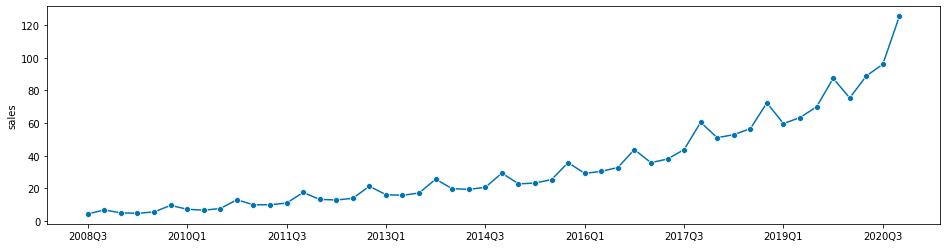

In [114]:
# code here (0.25 pt.)
_=plot_series(y)

### 1.5 Split the data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [115]:
# code here (0.5 pt.)
y_train, y_test = temporal_train_test_split(y, test_size = 0.2)

plot train and test samples using ```plot_series``` 

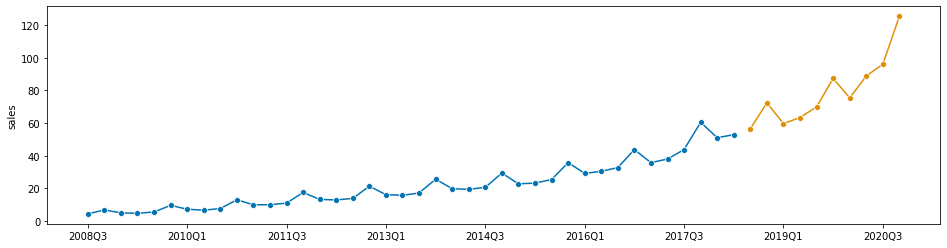

In [116]:
# code here (0.25 pt.)
_=plot_series(y_train,y_test)

## 2. ARIMA models (6 pt.)
[back to contents](#Contents)

### 2.1 Check stationarity (0.75 pt.)
[back to contents](#Contents)

Check whether the time series  is stationary

Use ```adfuller``` and ```kpss```

In [118]:
# code here (0.15 pt.)
adfuller(y_train)[1] < 0.05

False

In [119]:
# code here (0.15 pt.)
kpss(y_train)[1]>0.05

False

If it is not stationary, take differences until the time series becomes stationary

```np.diff(y_train)```

In [120]:
# code here (0.15 pt.)
y_train_diff = np.diff(y_train)
adfuller(y_train_diff)[1]<0.05
kpss(y_train_d)[1]>0.05

True

In [61]:
# code here (0.15 pt.)
y_test_diff = np.diff(y_test)
adfuller(y_test_diff)[1]<0.05
kpss(y_test_diff)[1]>0.05

True

What is the order of integration?

In [121]:
# code here (0.15 pt.)
'''One'''

'One'

### 2.2 Estimate AutoArima (1.5 pt.)
[back to contents](#Contents)

For this part use ```AutoARIMA``` from ```sktime```

Estimate AutoArima and name the result ```model_AArima```:

```AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)```

```model_AArima.fit(...)```


In [122]:
# code here (0.25 pt.)
model_AArima = AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=2)
model_AArima.fit(y_train)

AutoARIMA(d=2, max_p=4, max_q=4, suppress_warnings=True)

What specification of ```ARIMA(p,d,q)``` has been chosen as the best?

```.summary()``` 

In [123]:
# code here (0.25 pt.)
model_AArima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(3, 2, 1)   Log Likelihood                 -70.378
Date:                Tue, 09 Mar 2021   AIC                            152.756
Time:                        21:03:11   BIC                            162.582
Sample:                             0   HQIC                           156.252
                                 - 40                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3920      0.396      0.989      0.322      -0.385       1.169
ar.L1         -1.0031      0.055    -18.158      0.000      -1.111      -0.895
ar.L2         -0.9979      0.040    -24.955      0.000      -1.076      -0.920
ar.L3         -0.9894      0.015    -67.970      0.000      -1.018      -0.961
ma.L1          0.1338      0.212      0.631      0.528      -0.282       0.549
sigma2         1.7384      0.348      4.999      0.000       1.057       2.420
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                43.44
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               4.77   Skew:                             1.49
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
# code here (0.5 pt.)
print('ARIMA(3,2,1)')

ARIMA(3,2,1)


Make predictions for ```fh=np.arange(len(...)) + 1``` 

```model_AArima.predict(fh=...)```

In [125]:
# code here (0.25 pt.)
y_pred_AArima = model_AArima.predict(fh=np.arange(len(y_test)) + 1)

Plot ```y_train, y_test, y_pred_AArima``` using ```plot_series(...)```and calculate SMAPE forecast quality metric:```smape_loss(...)```

0.07016679656727909

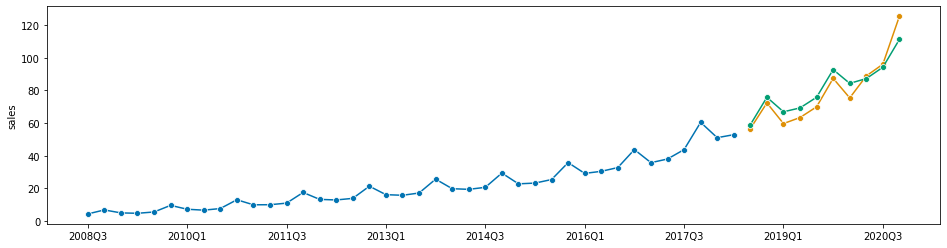

In [126]:
# code here (0.25 pt.)
plot_series(y_train, y_test, y_pred_AArima)
smape_loss(y_test, y_pred_AArima)

### 2.3 Estimate AutoSarima (1.5 pt.)
[back to contents](#Contents)

For this part use ```AutoARIMA``` from ```sktime``` as well

Estimate AutoSarima and name the result ```model_ASArima```

The only difference from AutoArima is the seasonality period inside ```AutoARIMA```:

```AutoARIMA(sp=...,suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)```

```model_ASArima.fit(...)```


In [79]:
# code here (0.25 pt.)
model_ASArima=AutoARIMA(sp=4,suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=2)
model_ASArima.fit(y_train)

AutoARIMA(d=2, max_p=4, max_q=4, sp=4, suppress_warnings=True)

What specification of ```ARIMA(p,d,q)(P,D,Q)s``` has been chosen as the best?

```.summary()``` 

In [80]:
# code here (0.25 pt.)
model_ASArima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   40
Model:             SARIMAX(2, 2, 2)x(1, 1, [], 4)   Log Likelihood                 -44.817
Date:                            Tue, 09 Mar 2021   AIC                            103.635
Time:                                    19:38:26   BIC                            114.319
Sample:                                         0   HQIC                           107.278
                                             - 40                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0032      0.011      0.294      0.769      -0.018       0.025
ar.L1          1.2006      0.118     10.217      0.000       0.970       1.431
ar.L2         -0.8164      0.100     -8.137      0.000      -1.013      -0.620
ma.L1         -1.8531      0.555     -3.337      0.001      -2.941      -0.765
ma.L2          0.9364      0.556      1.684      0.092      -0.153       2.026
ar.S.L4        0.8846      0.177      5.001      0.000       0.538       1.231
sigma2         0.5969      0.398      1.498      0.134      -0.184       1.378
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 4.39
Prob(Q):                              0.57   Prob(JB):                         0.11
Heteroskedasticity (H):               5.57   Skew:                             0.30
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
# code here (0.5 pt.)
print('ARIMA(2, 2, 2)x(1, 1, [], 4)')

ARIMA(2, 2, 2)x(1, 1, [], 4)


Make predictions for ```fh=np.arange(len(...)) + 1``` 

```model_ASArima.predict(fh=...)```

In [82]:
# code here (0.25 pt.)
y_pred  = model_ASArima.predict(fh=np.arange(len(y_test)) + 1)

Plot ```y_train, y_test, y_pred_AArima``` using ```plot_series(...)```and calculate SMAPE forecast quality metric:```smape_loss(...)```

0.18008743467558985

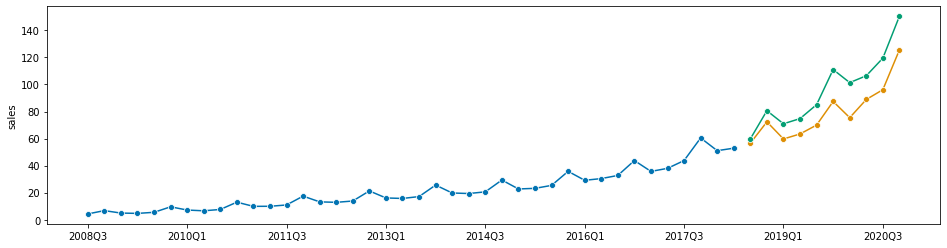

In [83]:
# code here (0.25 pt.)
plot_series(y_train, y_test, y_pred)
smape_loss(y_test, y_pred)

### 2.4 GridSearch (1 pt.)
[back to contents](#Contents)

Use GridSearch to choose the seasonality period, which gives the highest SMAPE 

```model = AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)```

Cross validation

```CV= SlidingWindowSplitter(initial_window = 20, step_length = 4 , fh = 10)```

```gscv = ForecastingGridSearchCV(model,cv=CV,param_grid={'sp':[2, 4, 8]})```

Fit on the train set:

gscv.fit()

Return results

df=pd.DataFrame(gscv. ...)

Sort values in df by ```'rank_test_sMAPE'```

```df.sort_values(by=['...'])```

In [84]:
# code here (0.75 pt.)

model = AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=2)
CV= SlidingWindowSplitter(initial_window = 20, step_length = 4 , fh = 10)
gscv = ForecastingGridSearchCV(model,cv=CV,param_grid={'sp':[2, 4, 8]})
gscv.fit(y_train)

ForecastingGridSearchCV(cv=<sktime.forecasting.model_selection._split.SlidingWindowSplitter object at 0x7fc6e5294890>,
                        forecaster=AutoARIMA(d=2, max_p=4, max_q=4,
                                             suppress_warnings=True),
                        param_grid={'sp': [2, 4, 8]})

What seasonality period would you choose and why?

In [85]:
# code here (0.25 pt.)
df = pd.DataFrame(gscv.cv_results_)
df.sort_values(by=['rank_test_sMAPE'])

,mean_fit_time,mean_score_time,param_sp,params,mean_test_sMAPE,rank_test_sMAPE
1,7.051046,0.042990,4,{'sp': 4},0.578061,1
0,4.768731,0.041976,2,{'sp': 2},0.591794,2
2,4.824244,0.032470,8,{'sp': 8},1.119565,3


In [127]:
'''we would use seasonality period 4 because the mean SMAPE is the smallest'''

'we would use seasonality period 4 because the mean SMAPE is the smallest'

### 2.5 Interval forecasts AutoArima (1.25 pt.)
[back to contents](#Contents)

Get 95% confidence intervals either for ```model_ASArima``` or for ```gscv```:

For example:

```y_pred_ASArima_best=model_ASArima.predict(fh=..., return_pred_int=True)```

Mean forecast or point forecast

mean=y_pred_ASArima_best[0]

Lower and upper bounds

upper_int=...

lower_int=...

In [86]:
# code here (1 pt.)
y_pred_ASArima_best=model_ASArima.predict(fh=np.arange(len(y_test))+1, return_pred_int=True)
mean=y_pred_ASArima_best[0]
upper_int =  y_pred_ASArima_best[1]["lower"]
lower_int =  y_pred_ASArima_best[1]["upper"]

Plot mean forecast, upper and lower intervals, test set:

```plot_series()```

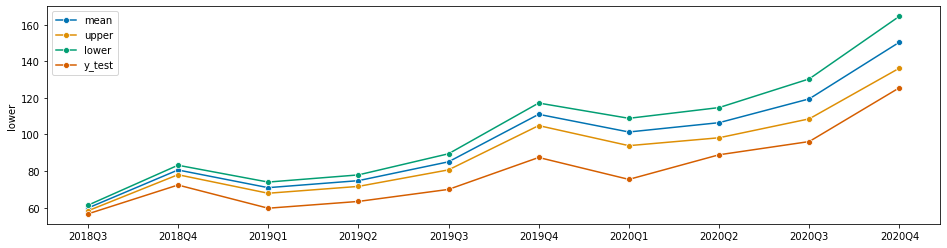

In [87]:
# code here (0.25 pt.)
_=plot_series(mean, upper_int, lower_int, y_test,  labels=["mean", "upper", "lower", "y_test"])